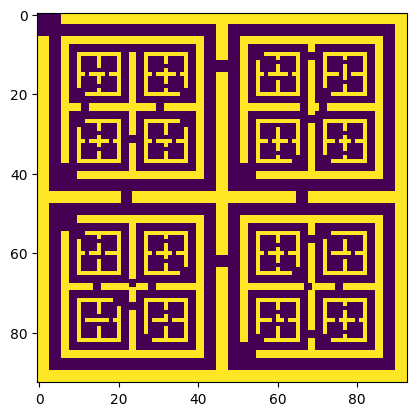

In [4]:
import numpy as np
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
from pyramid import create_pyramid


[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


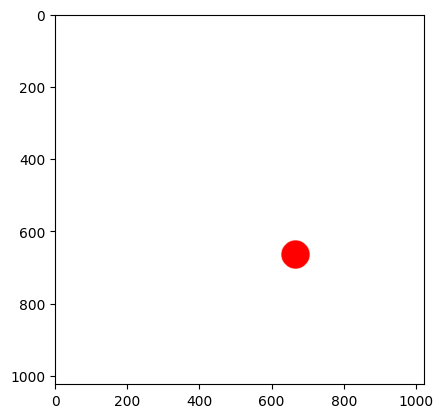

In [53]:
import numpy as np
from PIL import Image, ImageDraw

def get_maze_image(maze, player_position, image_height=512, image_width=512):
    """
    Generates an image of a maze with the player position.

    Parameters:
    - maze: 2D numpy array where 1 is a wall and 0 is a free space.
    - player_position: Tuple of continuous player position (x, y).
    - image_height: The height of the output image.
    - image_width: The width of the output image.

    Returns:
    - img_array: The generated image as a numpy array.
    """
    # Define the size of each cell based on the desired image size
    height, width = maze.shape
    cell_size_height = image_height // height
    cell_size_width = image_width // width
    cell_size = min(cell_size_height, cell_size_width)
    player_size_factor = 0.75  # Player radius is half of the cell size

    # Calculate the size of the image based on the cell size
    img_height = height * cell_size
    img_width = width * cell_size

    # Create a blank image with white background
    img = Image.new('RGB', (img_width, img_height), 'white')
    draw = ImageDraw.Draw(img)

    # Draw the maze
    for y in range(height):
        for x in range(width):
            if maze[y, x] == 1:
                draw.rectangle(
                    [x * cell_size, y * cell_size, (x + 1) * cell_size, (y + 1) * cell_size],
                    fill='black'
                )

    # Draw the player
    player_x, player_y = player_position
    player_pixel_x = player_y * cell_size  # Convert continuous position to pixel position
    player_pixel_y = player_x * cell_size  # Convert continuous position to pixel position
    player_radius = cell_size * player_size_factor * 0.5  # Scale player size with cell size

    draw.ellipse(
        [
            (player_pixel_x - player_radius, player_pixel_y - player_radius),
            (player_pixel_x + player_radius, player_pixel_y + player_radius)
        ],
        fill='red'
    )

    # Resize the image to the desired output size
    img = img.resize((image_width, image_height), Image.LANCZOS)

    # Convert the image to a numpy array
    img_array = np.array(img)
    return img_array

# Example usage
maze = np.zeros((10, 10))
# maze = create_pyramid(np.zeros((2, 2)), 2)[0]
player_position = (6.5, 6.5)  # Continuous position
img_array = get_maze_image(maze, player_position, image_height=1024, image_width=1024)
print(img_array)
plt.imshow(img_array)

In [14]:
img_array

In [37]:
from continuous_maze import ContinuousGridEnvironment

AttributeError: module 'matplotlib.pyplot' has no attribute 'set_xlim'

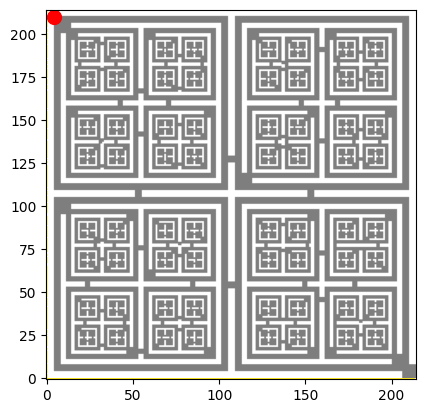

In [46]:
maze = create_pyramid(np.zeros((2, 2)), 4)[0]

env = ContinuousGridEnvironment(maze, [4., 4.], {})

env.display(plt)

AttributeError: module 'matplotlib.pyplot' has no attribute 'set_xlim'

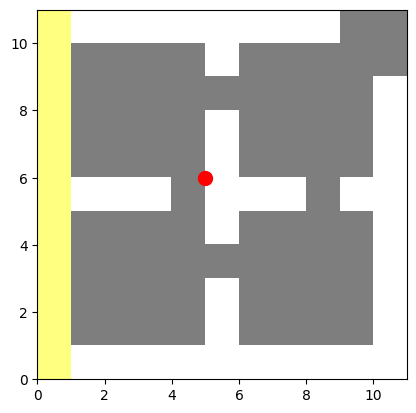